In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform pivot operation
def pivot(tableau, row, col):
    """Perform the pivot operation in Simplex Tableau."""
    tableau[row] = tableau[row] / tableau[row, col]
    for i in range(len(tableau)):
        if i != row:
            tableau[i] -= tableau[i, col] * tableau[row]
    return tableau

# Simplex algorithm implementation with enhanced visualization
def simplex_with_visualization(c, A, b, is_max=True):
    """Simplex algorithm that visualizes each iteration's tableau using color coding.
    
    Args:
        c (array): Coefficients of the objective function.
        A (array): Coefficients of the constraints.
        b (array): Right-hand side of the constraints.
        is_max (bool): True for maximization problem, False for minimization problem.
        
    Returns:
        solution: Optimal values for the decision variables.
        objective_value: Optimal value of the objective function.
    """
    
    # Convert to maximization if minimizing (negate the objective function)
    if not is_max:
        c = -c
    
    # Add slack variables by extending A and c
    tableau = np.hstack((A, np.eye(len(A)), b.reshape(-1, 1)))  # Slack variables and RHS
    tableau = np.vstack((tableau, np.hstack((-c, np.zeros(len(b) + 1)))))  # Objective function row
    
    # Column names: X1, X2, ..., S1, S2, ..., RHS
    num_variables = A.shape[1]
    num_constraints = A.shape[0]
    column_names = [f"X{i+1}" for i in range(num_variables)] + [f"S{i+1}" for i in range(num_constraints)] + ["RHS"]
    
    # Row names: constraint rows (S1, S2, ...) and the objective row (Z)
    row_names = [f"S{i+1}" for i in range(num_constraints)] + ["Z"]
    
    # Initial tableau display before iterations
    solution, objective_value = None, None
    visualize_tableau(tableau, column_names, row_names, None, None, None, initial=True)

    iteration = 1  # Track iteration number
    
    while True:
        # Check if the solution is optimal (all coefficients in the objective row are non-negative)
        if np.all(tableau[-1, :-1] >= 0):
            break

        # Choose entering variable (pivot column)
        col = np.argmin(tableau[-1, :-1])
        entering_var = column_names[col]

        # Check for unbounded solution
        if np.all(tableau[:-1, col] <= 0):
            raise ValueError("Problem is unbounded")

        # Choose leaving variable (pivot row)
        ratios = np.full_like(tableau[:-1, -1], np.inf)  # Initialize with infinity
        non_zero_mask = tableau[:-1, col] > 0  # Mask to avoid division by zero
        ratios[non_zero_mask] = tableau[:-1, -1][non_zero_mask] / tableau[:-1, col][non_zero_mask]
        row = np.argmin(ratios)
        leaving_var = row_names[row]

        # Get the original pivot element value before row modification
        pivot_element = tableau[row, col]

        # Perform the pivot operation
        tableau = pivot(tableau, row, col)
        
        # Update row names based on the current basic variable position
        row_names[row] = entering_var  # Update leaving variable
        row_names[-1] = "Z"  # Keep the objective row name

        # Visualize the tableau with the pivot element highlighted
        visualize_tableau(tableau, column_names, row_names, row, col, iteration, entering_var, leaving_var, pivot_element)
        
        # Increase iteration count
        iteration += 1

    # Extract the solution from the tableau
    solution = np.zeros(c.shape)
    for i in range(len(solution)):
        if np.any(tableau[:-1, i] == 1) and np.all(tableau[:-1, i] >= 0):
            solution[i] = tableau[np.argmax(tableau[:-1, i]), -1]

    # For minimization, revert the sign of the objective value
    objective_value = tableau[-1, -1] if is_max else -tableau[-1, -1]
    print(f"Optimal solution: {solution}")
    print(f"Optimal objective value: {objective_value}") 
    return solution, objective_value

# Function to visualize the tableau with specified colors
def visualize_tableau(tableau, col_labels, row_labels, pivot_row, pivot_col, iteration, entering_var=None, leaving_var=None, pivot_element=None, initial=False):
    """Create a table for the current tableau at each iteration, with the pivot element in green."""
    
    plt.figure(figsize=(12, 6))  # Adjusted size for better appearance
    ax = plt.gca()
    
    # Create a color array for the table
    colors = np.full_like(tableau, fill_value='#D3D3D3', dtype=object)  # Light gray for all cells
    colors[:, -1] = '#A9A9A9'  # Dark gray for RHS column
    if pivot_row is not None and pivot_col is not None:
        colors[pivot_row, pivot_col] = '#afd30b'  # Highlight pivot element in green

    # Create the table
    table = ax.table(cellText=tableau, colLabels=col_labels, rowLabels=row_labels, 
                     cellLoc='center', loc='center', cellColours=colors)
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Smaller font size
    table.scale(1.5, 1.5)  # Adjust the scale for better view

    # Add title with reduced vertical space
    if initial:
        plt.title("Initial Tableau (before iterations)", fontsize=12, pad=0.5)
    elif entering_var and leaving_var and pivot_element is not None:
        plt.title(f"Simplex Tableau - Iteration {iteration}\nEntering: {entering_var}, Leaving: {leaving_var}, Pivot Element: {pivot_element}", fontsize=12, pad=0.5)
    
    plt.axis('off')  # Turn off the axis
    plt.show()

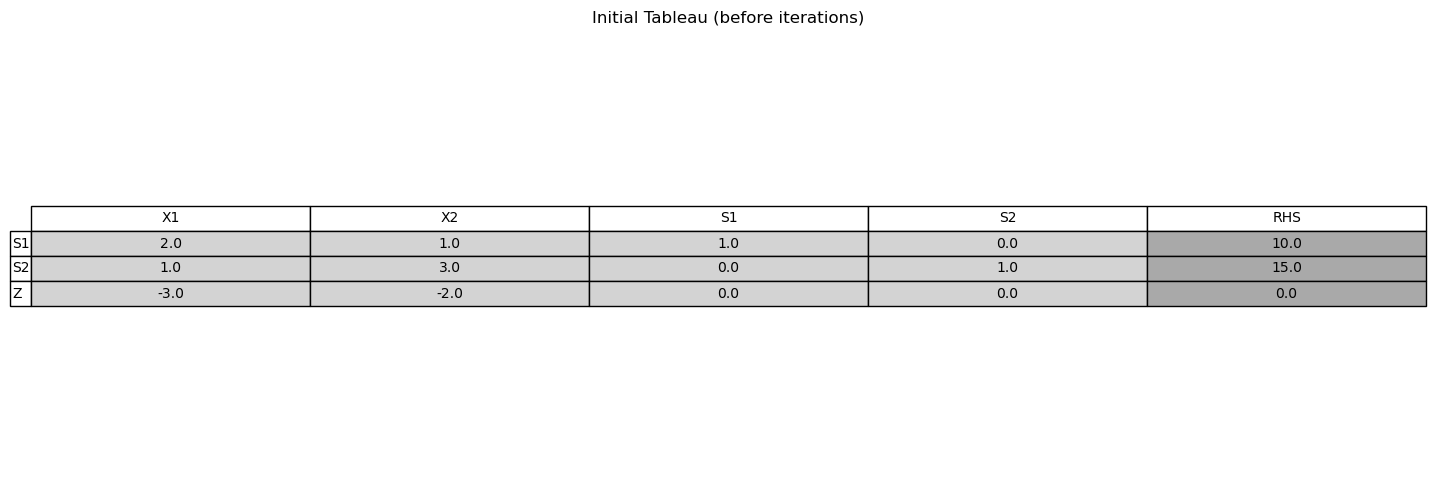

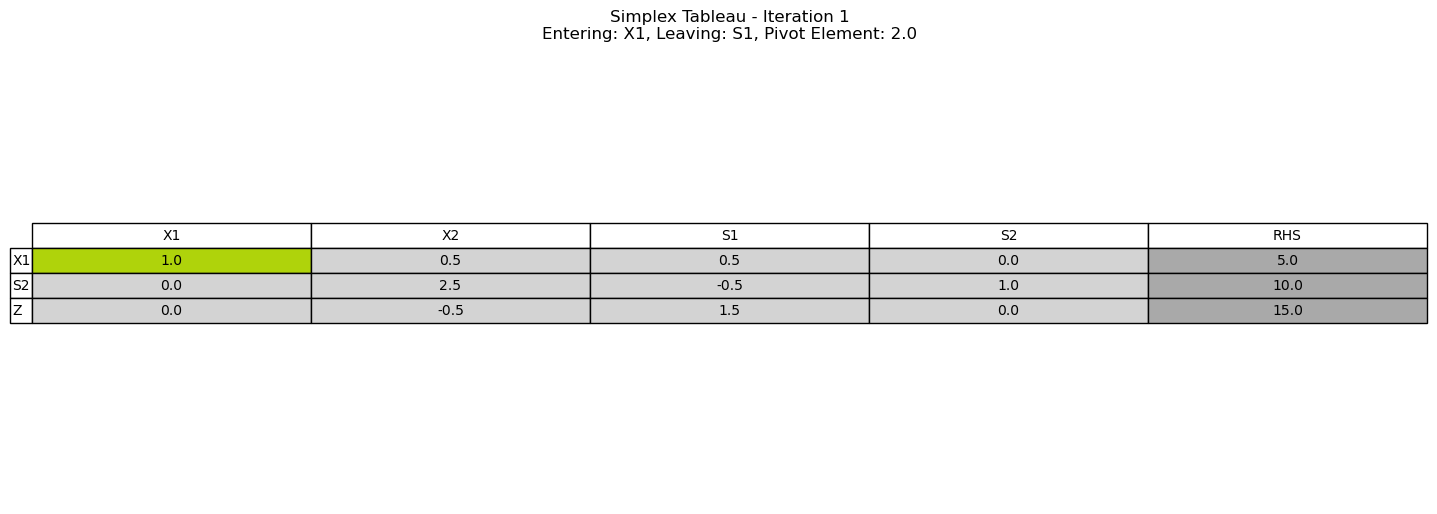

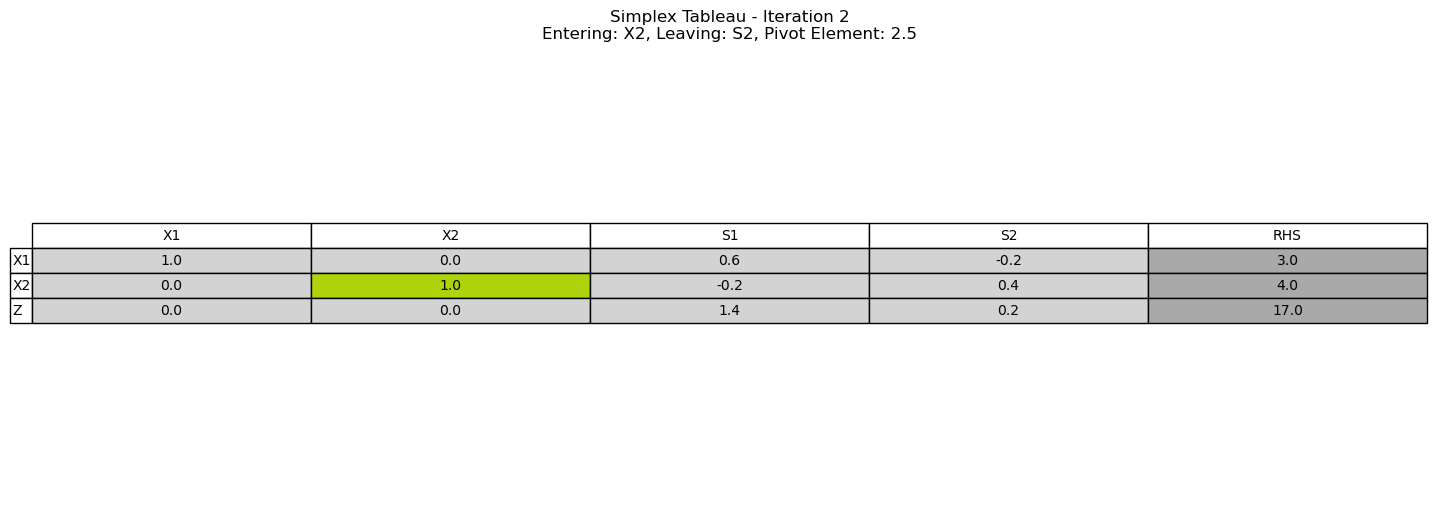

Optimal solution: [3. 4.]
Optimal objective value: 17.0


In [3]:
# Example usage for maximization
c_max = np.array([3, 2])  # Coefficients of the objective function (maximize)
A_max = np.array([[2, 1], [1, 3]])  # Coefficients of the constraints
b_max = np.array([10, 15])  # RHS of the constraints

# Solve the maximization problem and visualize iterations
simplex_with_visualization(c_max, A_max, b_max, is_max=True);